# 붓꽃의 품종분류
setosa, versicolor, cirginica 3종류의 붓꽃의 품종이 분류되어 있고, 

꽃잎[petal]과 꽃받침(sepal)의 폭 & 길이 데이터를 가지고 있을 때 어떤 `class`(종류)의 붗꽃인지 `Classification`(분류)하는 학습

데이터 포인트 하나(붓꽃 하나)에 대한 기대출력은 꽃의 품종

이런 특정 데이터 포인트에 대한 출력, 즉 출력되는 품종을 `label`(레이블)이라고 함

## 데이터 적재 및 탐구 🔎
scikit-learn의 datasets 모듈에서 가져와서 사용

In [59]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [60]:
# load_iris()는 딕셔너리 형태의 객체로 key, val 형태
# iris_dataset의 key
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [61]:
# 데이터에 대한 설명이 DESCR에 들어있다!
print(iris_dataset['DESCR']) # print를 찍어야 sep되서 읽기 좋게 나오네!

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [62]:
# 뭐래..

In [63]:
# 타겟의 이름
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
# 각 특성을 설명하는 문자열 리스트
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
# 데이터는 data 필드에 들어있음!
print(type(iris_dataset['data']))
# numpy array 형태로 있네유!

<class 'numpy.ndarray'>


In [66]:
# 데이터 대충 10개만 봐볼까유
iris_dataset['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [67]:
# 얼마나 많나
iris_dataset['data'].shape

(150, 4)

In [68]:
# 각 150개의 행 데이터는 특성에 대응하는 값들이고, 
# 머신러닝에서 각 아이템은 `샘플`이라고 하며 속성은 `특성`이라고 한다!
# 따라서 data 배열의 크기는 [샘플 수 * 특성 수] 

In [69]:
iris_dataset['data'][0]
# 첫 번째 붓꽃의 꽃 받침의 길이는 5.1cm이고, ... 꽃잎 폭은 0.2cm이네!

array([5.1, 3.5, 1.4, 0.2])

In [70]:
# target 배열은 샘플 붓꽃의 품종을 담은 numpy 배열!
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
iris_dataset['target'].shape
# 원소들이 각각의 샘플에 대한 붓꽃의 종류를 담은 1차원 배열이구나!!

(150,)

In [72]:
# 숫자의 의미를 target_names를 참조해보면 0은 setosa, 1은 versicolor, 2는 virginica
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


## 성과 측정: 훈련 데이터와 테스트 데이터
우리가 만든 모델의 예측의 신뢰도를 판단할 수 있어야 함!

위의 150개 데이터를 훈련과, 테스팅에 사용하면 모델이 값을 기억해버렸을 수 있기 떄문에 `일반화` 측정이 힘듦.

따라서 데이터를 두 그룹으로 나누어 훈련데이터(훈련세트)와 테스트데이터(테스트 세트 or 홀드아웃 세트)로 사용

- 훈련데이터: 머신러닝 모델을 만들 때 사용
- 테스트데이터: 모델이 얼마나 잘 작동하는지 측정하는데 사용

### 데이터 나누기!
scikit-learn은 데이터셋을 섞어서 나누어주는 train_test_split함수를 제공

이 함수는 75%를 레이블 데이터와 함께 훈련 세트로 뽑으며, 25%는 레이블 데이터와 함께 테스트 세트로 뽑음(25%가 일반적으로 적절하다고 한다)

... 오 별게 다있네 역시 찐들

### convention

scikit-learn에서 데이터는 `대문자 X`로 표시하고 레이블은 `소문자 y`로 표기

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
    )
# random_state=0(초기값)을 지정해주면 난수를 고정하여 정렬을 기억할 수 있음!

In [108]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(112, 4) (38, 4)
(112,) (38,)


## 데이터 살펴보기
비정상적인 값이나 단위가 있는지 확인하기 위해 `시각화`를 이용한다!

산점도를 이용하면 (x,y) 2개의 특성 정도만 그릴 수 있는데, 여러가지 특성을 나타내보고 싶기 때문에 `산점도 행렬`을 사용!

우리는 각 붓꽃당 4개의 특성을 가지고 있고 이 정도면 꽤 괜찮은 방법임..ㅎ

하지만 산점도 행렬에 모든 특성의 관계가 나타나는 것이 아니기 때문에 각각의 나누어진 산점도 그래프에는 드러나지 않는 중요한 성질이 있을 수 있음을 간과하지 말 것

In [148]:
# X_train데이터를 그려볼건데, numpy형태의 데이터를 찍으려면 pandas의 DataFrame으로 컨버팅 시켜줘야한다!
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 그래도 사용!
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [150]:
# iris_dataframe.head()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C79448A278>,
      dtype=object)

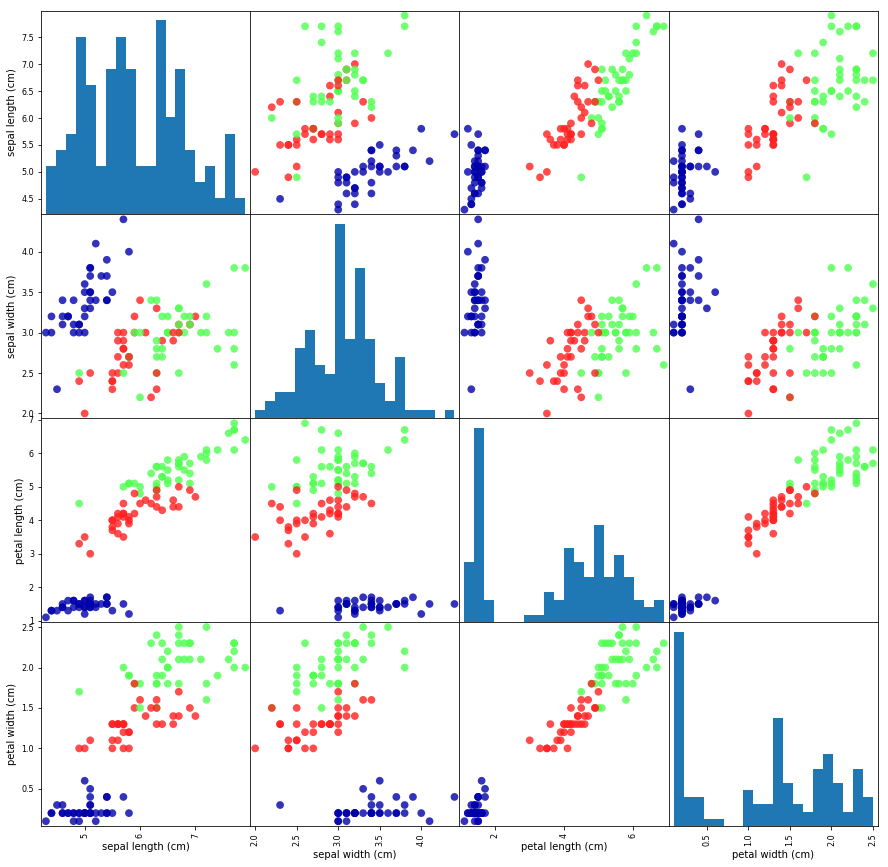

In [167]:
import mglearn
from pandas.plotting import scatter_matrix
scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

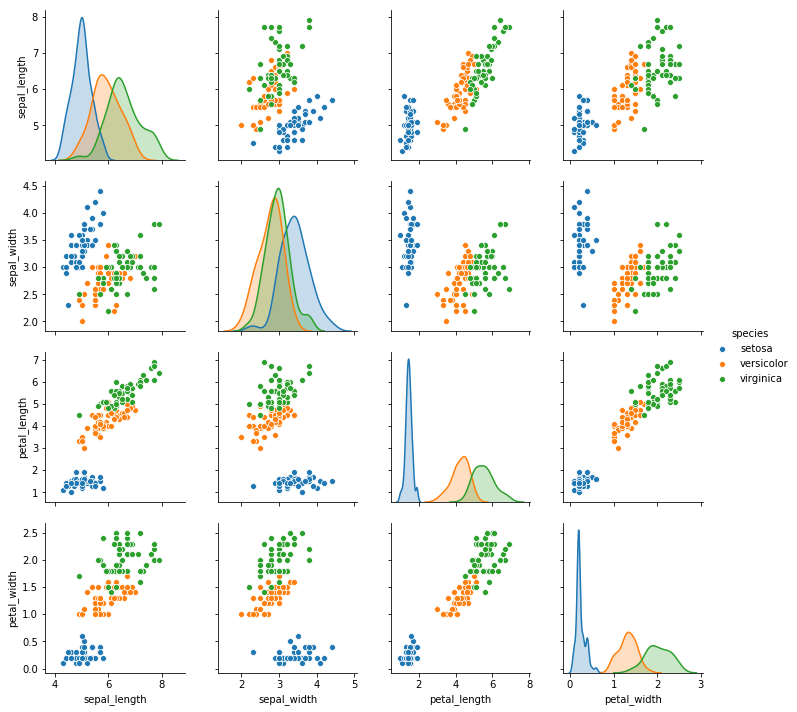

In [171]:
import seaborn as sns

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

## 사용할 모델 [k-최근접 이웃 알고리즘]

k-Nearest Neighbors, 통칭 `knn`을 사용

knn 알고리즘에서 k는 가장 가까운 이웃 '하나'가 아니라 훈련 데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾음!

그 다음 이웃들의 클래스 중 빈도가 가장 높은 클래스를 `예측값`으로 사용함.

---

scikit-learn의 모든 머신러닝 모델은 Estimator라는 파이썬 클래스로 각각 구현되어 있음.

`knn`은 neighbors 모듈 아래 KNeighborsClassifier 클래스에 구현되어 있음!

모델을 사용하려면 객체를 만들어야하고, 생성 시 매개변수 중 하나는 이웃의 개수이고 우리는 일단 1개 합시당.

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [175]:
# knn이라는 변수에 knn알고리즘을 캡슐화했고,
# 훈련 데이터셋을 적용하여 모델을 만들려면 fit메서드를 사용
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [176]:
# fit 메서드는 knn 객체 자체를 변경시키고 반환함

## 예측하기 👾

이제 훈련된 모델이 생겼으니까 야생의 붓꽃을 넣어서 확인해보자!

[5, 2.9, 1, 0.2]의 값을 가진 붓꽃의 품종을 넣어볼까?

In [181]:
import numpy as np

# 야생의 붓꽃 데이터를 생성한다!
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new

array([[5. , 2.9, 1. , 0.2]])

In [195]:
# 예측에는 knn 객체의 predict메서드를 사용
prediction = knn.predict(X_new)

print(f"예측값: {prediction}")
print(f"예측한 타깃의 이름: {iris_dataset['target_names'][prediction]}")

예측값: [0]
예측한 타깃의 이름: ['setosa']


## 모델 평가
우리는 어떤 예측값을 받아냈지만 이게 정확히 맞는지는 당근 모른다.

남겨둔 테스트 데이터로 `정확도`를 검증해보자!

In [196]:
y_pred = knn.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [197]:
# 기존 label과 맞는지 평균을 내보자!
np.mean(y_pred == y_test)

0.9736842105263158

In [198]:
# 또한 knn 객체의 score 메서드로도 테스트 세트의 정확도를 계산할 수 있음
knn.score(X_test, y_test)

0.9736842105263158

In [199]:
# 오호... 할만하넴...